In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


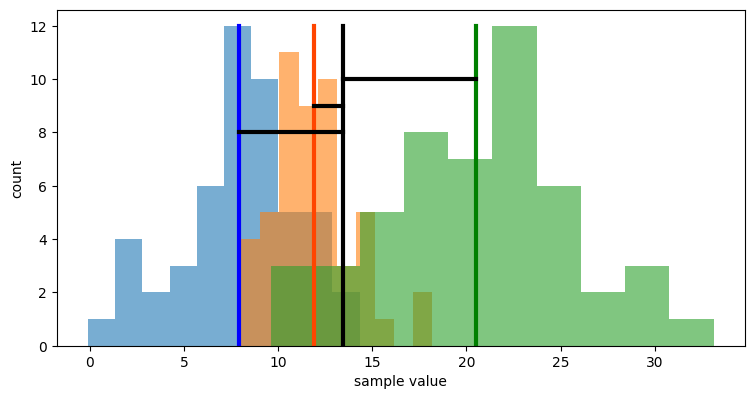

In [28]:
# 3 groups example

gr1, gr2, gr3 = stats.norm.rvs(8,3,50), stats.norm.rvs(12,2,50), stats.norm.rvs(20,4,50)
gr_all = np.concatenate((gr1,gr2,gr3))

fig,ax = plt.subplots(1,1)
plt.hist(gr1, alpha = 0.6)
plt.hist(gr2, alpha = 0.6)
plt.hist(gr3, alpha = 0.6)
plt.plot([gr1.mean(),gr1.mean()], [0,12], color = 'blue', lw = 3)
plt.plot([gr2.mean(),gr2.mean()], [0,12], color = 'orangered', lw = 3)
plt.plot([gr3.mean(),gr3.mean()], [0,12], color = 'green', lw = 3)
plt.plot([gr_all.mean(),gr_all.mean()], [0,12], color = 'black', lw = 3)
plt.plot([gr_all.mean(),gr1.mean()], [8,8], color = 'black', lw = 3)
plt.plot([gr_all.mean(),gr2.mean()], [9,9], color = 'black', lw = 3)
plt.plot([gr_all.mean(),gr3.mean()], [10,10], color = 'black', lw = 3)
plt.xlabel('sample value')
plt.ylabel('count')
fig.subplots_adjust(bottom=0.2, right=1.2, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [3]:
# example 1
url = 'https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/main/Data/eye_color.csv'
data = pd.read_csv(url)

print(data)

    group  frequency
0       1       28.3
1       1       29.4
2       1       28.5
3       1       29.9
4       1       27.2
5       1       25.7
6       2       29.1
7       2       26.9
8       2       28.0
9       2       24.2
10      2       26.4
11      3       24.5
12      3       25.7
13      3       24.8
14      3       26.3
15      3       25.0
16      3       23.7
17      3       27.9
18      3       26.8


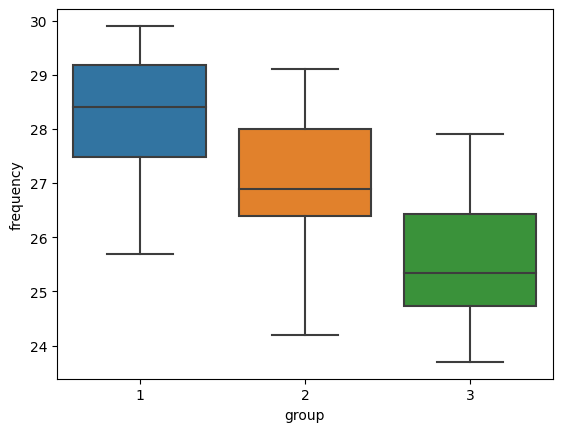

In [4]:
# boxplot
sns.boxplot(data = data, y = 'frequency', x = 'group', orient = 'v')
plt.show()

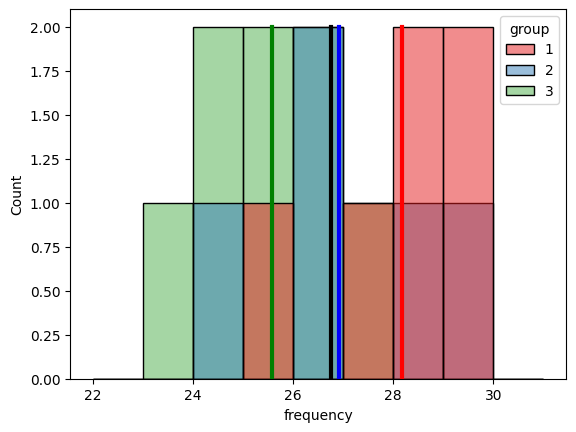

In [5]:
# histogram

gr1 = data.frequency[data.group==1]
gr2 = data.frequency[data.group==2]
gr3 = data.frequency[data.group==3]
gr_all = data.frequency

gr1_mean = gr1.mean()
gr2_mean = gr2.mean()
gr3_mean = gr3.mean()
all_mean = gr_all.mean()

sns.histplot(data, x="frequency", hue="group", bins = np.arange(22,32,1), palette = 'Set1')
plt.plot([gr1_mean,gr1_mean], [0, 2], color = 'red', lw =3 )
plt.plot([gr2_mean,gr2_mean], [0, 2], color = 'blue', lw =3 )
plt.plot([gr3_mean,gr3_mean], [0, 2], color = 'green', lw =3 )
plt.plot([all_mean,all_mean], [0, 2], color = 'black', lw =3 )

plt.show()


In [6]:
# anova test using formulas

N, N1, N2, N3 = len(gr_all),len(gr1),len(gr2),len(gr3)

SSbet = N1*(all_mean-gr1_mean)**2+N2*(all_mean-gr2_mean)**2+N3*(all_mean-gr3_mean)**2
nubet = 3-1
MSbet = SSbet/nubet

SSwit = (gr1-gr1_mean)@(gr1-gr1_mean)+(gr2-gr2_mean)@(gr2-gr2_mean)+(gr3-gr3_mean)@(gr3-gr3_mean)
nuwit = N-3
MSwit = SSwit/nuwit

Fstat = MSbet/MSwit
p = 1-stats.f.cdf(Fstat,nubet,nuwit)

print('F statistic = {} , p-value = {}'.format(round(Fstat,4),round(p,4)))

F statistic = 4.8023 , p-value = 0.0232


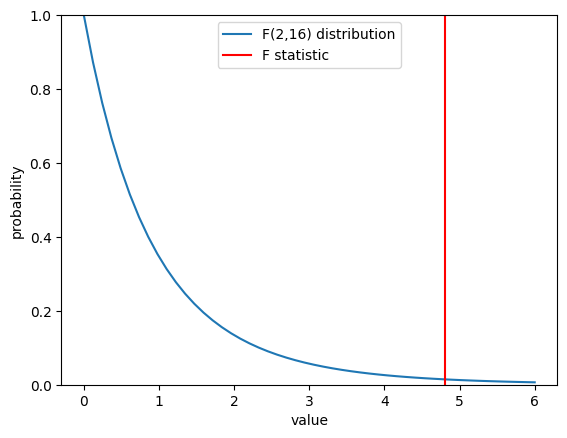

In [7]:
# present distribution
x = np.linspace(0,6,50)
plt.plot(x, stats.f.pdf(x,nubet,nuwit), label = 'F({},{}) distribution'.format(nubet,nuwit))
plt.plot([Fstat,Fstat], [0,1], color = 'red', label = 'F statistic')
plt.ylim((0,1))
plt.xlabel('value')
plt.ylabel('probability')
plt.legend()
plt.show()


In [8]:
# effect size for anova

SStot = SSbet+SSwit
eta2 = SSbet/SStot

print('effect size \u03B72 = {}'.format(round(eta2,4)))


effect size η2 = 0.3751


In [9]:
# using function 

stats.f_oneway(gr1,gr2,gr3)


F_onewayResult(statistic=4.802346136941866, pvalue=0.023248951722088865)

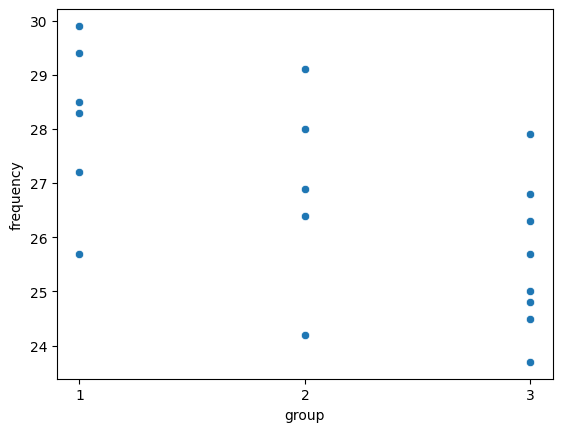

In [10]:
# present

sns.scatterplot(data, x = 'group', y = 'frequency')
plt.xticks((1,2,3))
plt.show()

In [11]:
# regression with dummy variables

y = data.frequency
D1 = np.ones((N,1))
D2 = np.concatenate((np.zeros((N1,1)),np.ones((N2,1)),np.zeros((N3,1))))
D3 = np.concatenate((np.zeros((N1,1)),np.zeros((N2,1)),np.ones((N3,1))))

X = np.concatenate((D1,D2,D3),axis=1)


In [12]:
# regerssion
b = np.linalg.inv(X.T@X)@X.T@y

yhat = np.dot(X,b)

Syx2 = (y-yhat).T@(y-yhat)/(len(y)-3)

print('b0 = {} , b1 = {} , b2 = {}, Syx2 = {}'.format(round(b[0],4),round(b[1],4),round(b[2],4),round(Syx2,4)))


b0 = 28.1667 , b1 = -1.2467 , b2 = -2.5792, Syx2 = 2.3944


In [13]:
# means 

mean_gr1 = b[0] 
mean_gr2 = b[0]+b[1]
mean_gr3 = b[0]+b[2]

print(round(mean_gr1,4),round(mean_gr2,4),round(mean_gr3,4))

28.1667 26.92 25.5875


In [14]:
# model significance and effect size

SSreg = (yhat-y.mean())@(yhat-y.mean())
vreg = 3-1
MSreg = SSreg/vreg

SSres = (y-yhat)@(y-yhat)
vres = N-3
MSres = SSres/vres

Fstat = MSreg/MSres
p = 1-stats.f.cdf(Fstat,vreg,vres)

SStot = (y-y.mean())@(y-y.mean())
R2 = SSreg/SStot
f2 = R2/(1-R2)

print('model significance: Fstat = {} , p-value = {}'.format(round(Fstat,4),round(p,4)))
print('model effect size: R2 = {}, Cohens f = {}'.format(round(R2,4),round(f2,4)))


model significance: Fstat = 4.8023 , p-value = 0.0232
model effect size: R2 = 0.3751, Cohens f = 0.6003


In [21]:
# coeffitient significance

Sb2_mat = Syx2*np.linalg.inv(X.T@X)
print(Sb2_mat) # diagonal value - variance of b0 b1 b2

CI_b0 = b[0]+(Sb2_mat[0,0])**0.5*stats.t.ppf([0.025,0.975],vres)
print('b0 95% CI = [{} , {}]'.format(round(CI_b0[0],4),round(CI_b0[1],4)))
CI_b1 = b[1]+(Sb2_mat[1,1])**0.5*stats.t.ppf([0.025,0.975],vres)
print('b1 95% CI = [{} , {}]'.format(round(CI_b1[0],4),round(CI_b1[1],4)))
CI_b2 = b[2]+(Sb2_mat[2,2])**0.5*stats.t.ppf([0.025,0.975],vres)
print('b2 95% CI = [{} , {}]'.format(round(CI_b2[0],4),round(CI_b2[1],4)))

b0_tstat = b[0]/(Sb2_mat[0,0])**0.5
b0_p = 1-stats.t.cdf(abs(b0_tstat),vres)
b1_tstat = b[1]/(Sb2_mat[1,1])**0.5
b1_p = 1-stats.t.cdf(abs(b1_tstat),vres)
b2_tstat = b[2]/(Sb2_mat[2,2])**0.5
b2_p = 1-stats.t.cdf(abs(b2_tstat),vres)

print('model coefficient significance: b0 p-value = {} , b1 p-value = {} , b2 p-value = {}'.format(round(b0_p,4),round(b1_p,4),round(b2_p,4)))


[[ 0.39906337 -0.39906337 -0.39906337]
 [-0.39906337  0.87793941  0.39906337]
 [-0.39906337  0.39906337  0.69836089]]
b0 95% CI = [26.8275 , 29.5058]
b1 95% CI = [-3.233 , 0.7397]
b2 95% CI = [-4.3507 , -0.8076]
model coefficient significance: b0 p-value = 0.0 , b1 p-value = 0.101 , b2 p-value = 0.0035


In [27]:
# compare groups

# group1 - group 2
t_12 = b[1]/(Sb2_mat[1,1])**0.5
p_12 = 1-stats.t.cdf(abs(t_12),vres)

# group1 - group 3
t_13 = b[2]/(Sb2_mat[2,2])**0.5
p_13 = 1-stats.t.cdf(abs(t_13),vres)

# group2 - group 3
var_23 = Sb2_mat[1,1]+Sb2_mat[2,2]-2*Sb2_mat[1,2]
t_23 = (b[2]-b[1])/(var_23)**0.5
p_23 = 1-stats.t.cdf(abs(t_23),vres)

print('groups comparison: groups 1-2 p-value = {} ,  groups 1-3 = {} , groups 2-3 = {}'.format(round(p_12,4),round(p_13,4),round(p_23,4)))


groups comparison: groups 1-2 p-value = 0.101 ,  groups 1-3 = 0.0035 , groups 2-3 = 0.0752


In [70]:
# example 2 non-linear regression

url = 'https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/main/Data/muscle_force.csv'

data = pd.read_csv(url)

print(data)

    Force  Length
0      49       1
1      52       1
2      60       1
3      65       1
4     108       2
5     110       3
6     142       3
7     190       4
8     205       4
9     212       4
10    202       5
11    201       6
12    210       6
13    213       6
14    230       6
15    245       6
16    187       7
17    210       7
18    212       7
19    195       8
20    205       9


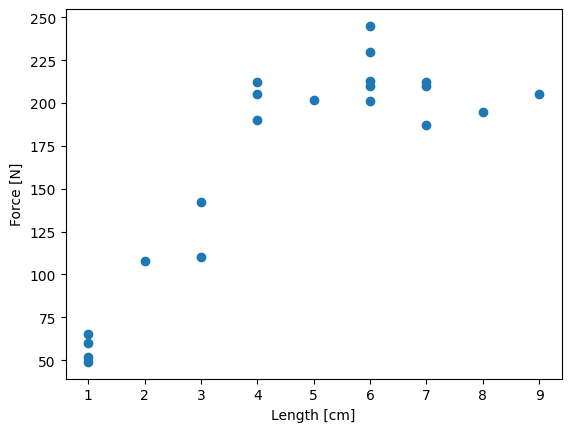

In [55]:
# scatter plot

plt.scatter(data.Length, data.Force)
plt.xlabel('Length [cm]')
plt.ylabel('Force [N]')
plt.show()

In [71]:
# try linear model
N = len(data.Force)

y = data.Force
X = np.array([np.ones(N), data.Length])
X = X.T

b = np.linalg.inv(X.T@X)@X.T@y

yhat = np.dot(X,b)

Syx2 = (y-yhat).T@(y-yhat)/(N-3)

print('b0 = {} , b1 = {} , Syx2 = {}'.format(round(b[0],4),round(b[1],4),round(Syx2,4)))

b0 = 64.72 , b1 = 22.1019 , Syx2 = 1288.5535


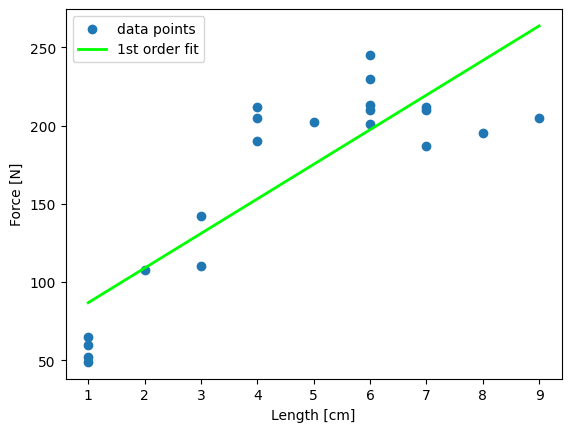

model p-value = 0.0 , R2= 0.7214


In [77]:
# linear regression plot

plt.scatter(data.Length, data.Force, label = 'data points')
plt.plot(data.Length, yhat, lw = 2, color = 'lime', label = '1st order fit')
plt.xlabel('Length [cm]')
plt.ylabel('Force [N]')
plt.legend(loc = 'upper left')
plt.show()

SSreg = (yhat-y.mean())@(yhat-y.mean())
vreg = 2-1
MSreg = SSreg/vreg

SSres = (y-yhat)@(y-yhat)
vres = N-2
MSres = SSres/vres

Fstat = MSreg/MSres
p = 1-stats.f.cdf(Fstat,vreg,vres)

SStot = (y-y.mean())@(y-y.mean())
R2 = SSreg/SStot

print('model p-value = {} , R2= {}'.format(round(p,4),round(R2,4)))

In [85]:
# 2nd order regression model

y = data.Force
X_2 = np.array([np.ones(N), data.Length, data.Length**2])
X_2 = X_2.T

b_2 = np.linalg.inv(X_2.T@X_2)@X_2.T@y

yhat_2 = np.dot(X_2,b_2)

Syx2_2 = (y-yhat_2).T@(y-yhat_2)/(N-3)

print('b0 = {} , b1 = {} , b2 = {} , Syx2 = {}'.format(round(b_2[0],4),round(b_2[1],4),round(b_2[2],4),round(Syx2_2,4)))

b0 = -8.3022 , b1 = 68.6895 , b2 = -5.2286 , Syx2 = 334.8128


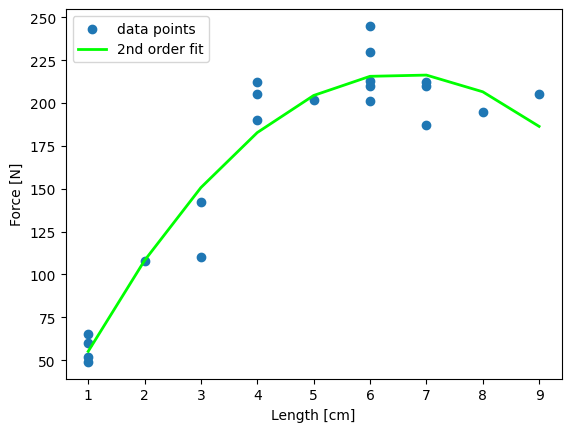

model p-value = 0.0 , R2= 0.9276


In [86]:

plt.scatter(data.Length, data.Force, label = 'data points')
plt.plot(data.Length, yhat_2, lw = 2, color = 'lime', label = '2nd order fit')
plt.xlabel('Length [cm]')
plt.ylabel('Force [N]')
plt.legend(loc = 'upper left')
plt.show()

SSreg_2 = (yhat_2-y.mean())@(yhat_2-y.mean())
vreg_2= 3-1
MSreg_2 = SSreg_2/vreg_2

SSres_2 = (y-yhat_2)@(y-yhat_2)
vres_2 = N-3
MSres_2 = SSres_2/vres_2

Fstat_2 = MSreg_2/MSres_2
p_2 = 1-stats.f.cdf(Fstat_2,vreg_2,vres_2)

SStot_2 = (y-y.mean())@(y-y.mean())
R2_2 = SSreg_2/SStot_2
print('model p-value = {} , R2= {}'.format(round(p_2,4) , round(R2_2,4)))

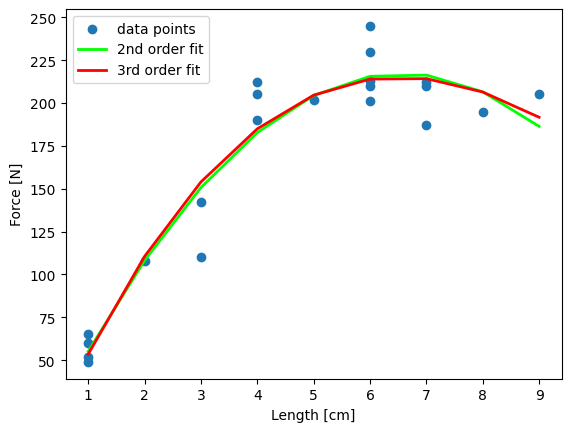

In [87]:
# 3rd degree
y = data.Force
X_3 = np.array([np.ones(N), data.Length, data.Length**2, data.Length**3])
X_3 = X_3.T

b_3 = np.linalg.inv(X_3.T@X_3)@X_3.T@y

yhat_3 = np.dot(X_3,b_3)

plt.scatter(data.Length, data.Force, label = 'data points')
plt.plot(data.Length, yhat_2, lw = 2, color = 'lime', label = '2nd order fit')
plt.plot(data.Length, yhat_3, lw = 2, color = 'red', label = '3rd order fit')
plt.xlabel('Length [cm]')
plt.ylabel('Force [N]')
plt.legend(loc = 'upper left')
plt.show()


In [88]:
# example 3 regression model with interactions

url = 'https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/main/Data/force_muscle.csv'
data = pd.read_csv(url)

print(data)

    force  velocity  tension
0     2.5       0.0      0.0
1     0.5       0.1      1.0
2     3.0       0.2      0.5
3     5.0       0.4      2.2
4     6.0       0.5      3.0
5     8.0       0.4      2.0
6     4.0       0.8      3.0
7     3.0       1.0      1.5
8     7.0       1.0      1.0
9     9.0       1.0      2.0
10   10.0       1.5      1.5
11   17.0       1.8      2.4
12   16.0       1.9      2.5
13   22.0       2.0      3.0
14   24.0       2.0      3.5


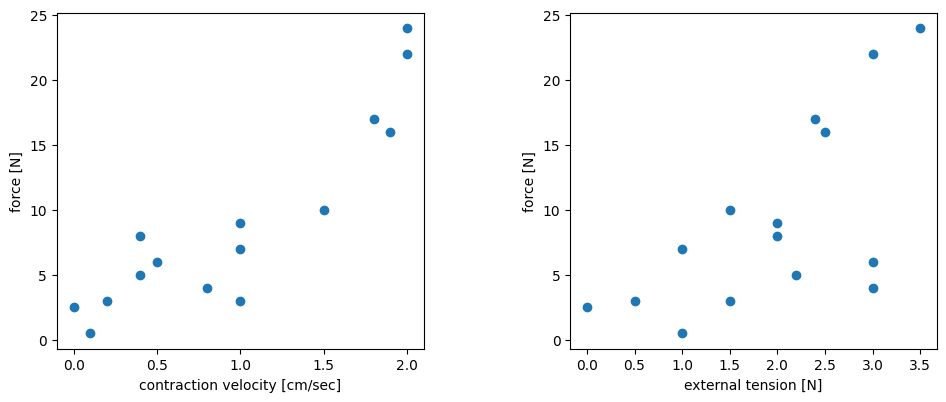

In [89]:
# scatter plot

fig,ax = plt.subplots(1,2)
ax[0].scatter(data.velocity,data.force)
ax[0].set_xlabel('contraction velocity [cm/sec]')
ax[0].set_ylabel('force [N]')
ax[1].scatter(data.tension,data.force)
ax[1].set_xlabel('external tension [N]')
ax[1].set_ylabel('force [N]')
fig.subplots_adjust(bottom=0.2, right=1.5, top=0.9, wspace=0.4, hspace=0.4)
plt.show()


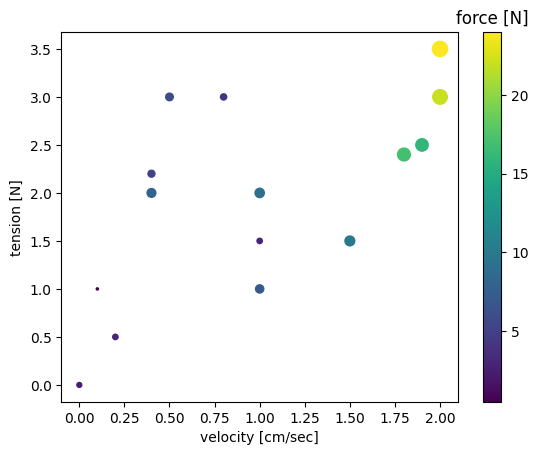

In [90]:
# scatter plot with colors

plt.scatter(data.velocity, data.tension, cmap='viridis', c=data.force, s=data.force*5, alpha = 1 )
plt.xlabel('velocity [cm/sec]')
plt.ylabel('tension [N]')
plt.colorbar().ax.set_title('force [N]')
plt.show()


In [91]:
# try linear multivariate rgression

y = data.force

X = np.array([np.ones(len(data.force)), data.velocity, data.tension])
X = X.T

b = np.linalg.inv(X.T@X)@X.T@y

yhat = np.dot(X,b)

Syx2 = (y-yhat).T@(y-yhat)/(len(y)-3)

print('b0 = {} , b1 = {} , b2 = {} , Syx2 = {}'.format(round(b[0],4),round(b[1],4),round(b[2],4),round(Syx2,4)))

SSreg = np.dot((yhat-y.mean()),(yhat-y.mean()))
vreg = 3-1
MSreg = SSreg/vreg

SSres = np.dot((yhat-y),(yhat-y))
vres = len(y)-3
MSres = SSres/vres

Fstat = MSreg/MSres
p_model = 1-stats.f.cdf(Fstat,vreg,vres)

R2 = SSreg/(SSreg+SSres)

print('p_value = {} , R2 = {} '.format(round(p_model,8),round(R2,4)))


b0 = -1.1362 , b1 = 8.1191 , b2 = 1.2201 , Syx2 = 11.0151
p_value = 3.015e-05 , R2 = 0.8236 


In [93]:
# model with interactions

X2 = np.array([np.ones(len(data.force)), data.velocity, data.tension, data.velocity*data.tension])
X2 = X2.T

b = np.linalg.inv(X2.T@X2)@X2.T@y

yhat2 = np.dot(X2,b)

Syx2 = (y-yhat2).T@(y-yhat2)/(len(y)-4)

print('b0 = {} , b1 = {} , b2 = {} ,  b3 = {} , Syx2 = {}'.format(round(b[0],4),round(b[1],4),round(b[2],4),round(b[3],4),round(Syx2,4)))

SSreg2 = np.dot((yhat2-y.mean()),(yhat2-y.mean()))
vreg2 = 4-1
MSreg2 = SSreg2/vreg2

SSres2 = np.dot((yhat2-y),(yhat2-y))
vres2 = len(y)-4
MSres2 = SSres2/vres2

Fstat = MSreg2/MSres2
p_model = 1-stats.f.cdf(Fstat,vreg2,vres2)

R2 = SSreg2/(SSreg2+SSres2)

print('p_value = {} , R2 = {} '.format(round(p_model,8),round(R2,4)))


b0 = 2.6838 , b1 = 0.6621 , b2 = -0.8938 ,  b3 = 3.2684 , Syx2 = 5.7903
p_value = 3.52e-06 , R2 = 0.915 


In [94]:
# addition test on interactions

SSadd = (yhat-yhat2)@(yhat-yhat2)

vadd = 1
MSadd = SSadd/vadd

Fadd = MSadd/MSres2
p_add = 1-stats.f.cdf(Fadd,vadd,vres2)

print('p-value of interaction contribution = {}'.format(round(p_add,4)))

p-value of interaction contribution = 0.0055
